# Third Assignment 

---

> Nikolaos Antonopoulos <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> antonopoulosn@hotmail.com

## Getting ready 
* Firstly, we have to import some packages that will be needed. 

In [1]:
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns


## Obtaining the data 

* We shall download a file with the tracks and their characteristics via Kaggle, and specifically this [link](https://www.kaggle.com/lehaknarnauli/spotify-datasets?select=tracks.csv).

In [2]:
songs=pd.read_csv('data/tracks.csv')

* Duly note here, that we could easily obtain the songs we would like using the Spotify API.
* We will show the way to do this later on, as we will obtain the test dataset from 'spotify_ids.txt'

## Exploring the data 

* It would be useful for us to see some histograms for the variables of our interest in order to understand our dataset better 

In [3]:
variables_to_be_ploted = ['popularity','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','tempo','valence' ]

* Enabling gg plot to make our diagrams more beautiful 

In [4]:
plt.style.use('ggplot')

* The following method, produces subplots of histograms based on the variables of the array we created  

In [5]:
def generate_histograms(idx_value):
    f,a = plt.subplots(2,2,figsize=(10,6))
    a = a.ravel()
    titles = [] 
    for idx,ax in enumerate(a):
        idx = idx + idx_value
        ax.hist(songs[variables_to_be_ploted[idx]],color = (np.random.random(), np.random.random(), np.random.random()))
        ax.set_title(variables_to_be_ploted[idx]) 

    plt.tight_layout()

    plt.show()

* We will produce 4 diagrams at a time 

* Firstly, we produce:
1. Popularity
2. Dancability 
3. Energy
4. Explicit
 
* We notice that the explicit variable only takes 2 values 

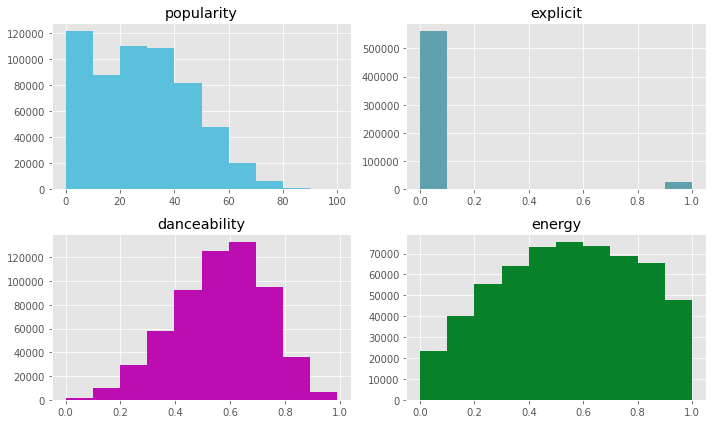

In [6]:
generate_histograms(0)

Following we produce 4 histograms for:
1. Key 
2. Loudness 
3. Mode 
4. Speechiness 

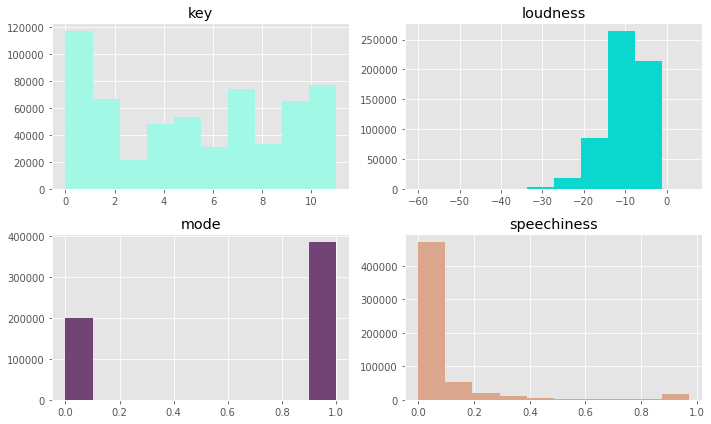

In [7]:
generate_histograms(4)


We also produce: 
1. Acousticness 
2. Instrumentalness 
3. Liveness 
4. Tempo 

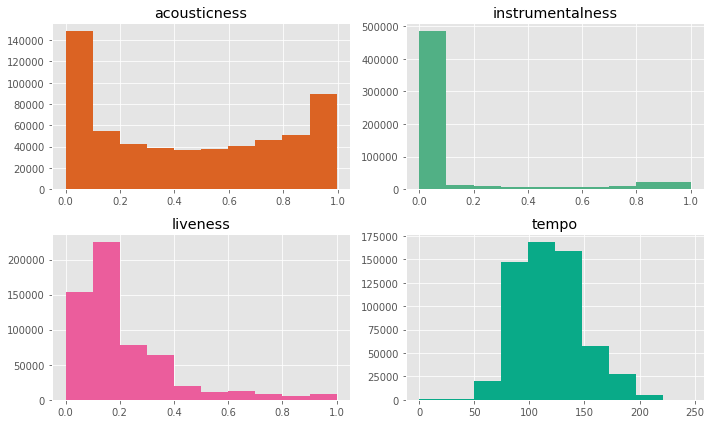

In [8]:
generate_histograms(8)

* Last, but not least, let's see our dependent variable, Valence 

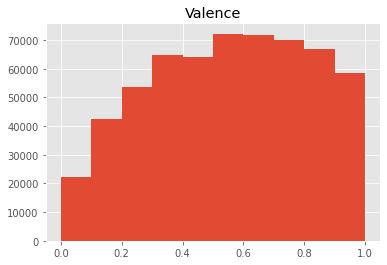

In [9]:
songs['valence'].hist(bins=10,range=[0,1])
plt.title('Valence');

## Transforming the data

* First things first, we shall check for null values

In [10]:
songs.set_index('id',inplace=True)

In [11]:
songs.isnull().values.any()

True

* Since we found some, we can remove them

In [12]:
songs.dropna(inplace=True)

* The 'release_date' does not add big value in this form. However, we can extract the year and the month of each song which might be related to valence 

In [13]:
songs['year'] = pd.DatetimeIndex(songs['release_date']).year
songs['month'] = pd.DatetimeIndex(songs['release_date']).month

* Also, there are some columns that are not useful for our models so we can drop them
* For that purpose, we can create a method that takes as an argument a list with those columns

In [14]:
def drop_columns(dataframe,to_be_deleted):
    dataframe.drop(to_be_deleted, axis=1, inplace=True)

* We can create the list, and call the method.

In [15]:
to_be_deleted = ['id_artists', 'release_date','artists','name'] 
drop_columns(songs, to_be_deleted) 

* Having completed deleting the null values and deleting the uneeded columns, we can proceed with the further transofrmation of our data
* By looking what each variable means, we observe that the domain of them vary.
* So, we can scale our data. However, we will exclude scaling our target variable, valence, since it will lose its meaning.

In [16]:
def scale_whole_df_except_valence(songs):
    
    valence_only = songs['valence']
    del songs["valence"]

    x = songs
    min_max_scaler = preprocessing.MinMaxScaler()
    songs[songs.columns] = min_max_scaler.fit_transform(songs[songs.columns].to_numpy())
    songs['valence'] = valence_only
    return songs 

songs_unscaled = songs.copy()
scale_whole_df_except_valence(songs) 

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,year,month,valence
id,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,0.06,0.021994,0.0,0.650858,0.4450,0.000000,0.713748,1.0,0.464470,0.676707,0.744000,0.1510,0.425564,0.6,0.181818,0.090909,0.1270
021ht4sdgPcrDgSk7JTbKY,0.00,0.016885,0.0,0.701312,0.2630,0.000000,0.579173,1.0,0.985582,0.800201,0.000000,0.1480,0.414029,0.2,0.181818,0.454545,0.6550
07A5yehtSnoedViJAZkNnc,0.00,0.031737,0.0,0.437941,0.1770,0.090909,0.593796,1.0,0.052729,0.997992,0.021800,0.2120,0.529335,1.0,0.181818,0.181818,0.4570
08FmqUhxtyLTn6pAh6bk45,0.00,0.030895,0.0,0.323915,0.0946,0.636364,0.490073,1.0,0.051905,0.998996,0.918000,0.1040,0.689907,0.6,0.181818,0.181818,0.3970
08y9GfoqCWfOGsKdwojr5e,0.00,0.028434,0.0,0.405651,0.1580,0.272727,0.659263,0.0,0.040165,0.992972,0.130000,0.3110,0.418945,0.8,0.181818,0.000000,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5rgu12WBIHQtvej2MdHSH0,0.50,0.045377,0.0,0.565086,0.5180,0.000000,0.803491,0.0,0.030072,0.788153,0.000000,0.0648,0.535333,0.8,0.991736,0.727273,0.2110
0NuWgxEp51CutD2pJoF4OM,0.72,0.026691,0.0,0.771948,0.6630,0.000000,0.837876,1.0,0.067147,0.141566,0.000297,0.0924,0.609183,0.8,0.991736,0.818182,0.6860
27Y1N4Q4U3EfDU5Ubw8ws2,0.70,0.032798,0.0,0.539859,0.3140,0.636364,0.721626,0.0,0.042019,0.898594,0.000150,0.0874,0.588905,0.8,0.991736,0.727273,0.0663


* Certain categorical variables, such as ‘key’, are value-encoded, but their relative values are meaningless.  
* If 0 is the key of C, and 1 is the key of C#, this does not mean the key of C# is intrinsically greater by 1 point than the key of C
* Having said that, we can transform key variable to a dummy 
* Inside the method, we can rename the columns that were generated through the get_dummies method. 

In [17]:
def dummify_key(df):
    df["key"] = df["key"].astype("category")
    df = pd.get_dummies(df, columns=["key"])
    starting_key = 0 
    
    for i in range (16, len(df.columns)):
        df = df.rename(columns={df.columns[i]: 'key_%d' % starting_key})
        starting_key = starting_key  + 1 
    return df 

songs_unscaled = dummify_key(songs_unscaled)
songs = dummify_key(songs)

* Last, we do not want to include songs from the test dataset to our train dataset. 
* So, we can search them and remove them 

In [20]:
with open('data/spotify_ids.txt', 'r') as f:
    all_track_ids_for_test = [line.strip() for line in f]

In [21]:
index_that_exist_in_both_df = []
for i in all_track_ids_for_test:
    if i in songs.index:
        index_that_exist_in_both_df.append(i)

In [22]:
len_before = len(songs)

586601

In [23]:
songs = songs.drop(index_that_exist_in_both_df)
songs_unscaled = songs_unscaled.drop(index_that_exist_in_both_df) 

In [24]:
len_after = len(songs)

586077

* We notice, that we found some songs that existed in both datasets

In [ ]:
len_before-len_after

## Exploring which Features Influence Valence

### Correlation

* Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. 

* First things first, as to explore the features that influence valence, we take a look at the correlation matrix
  (Dummy Key removed for demonstration purposes)

In [25]:
songs.corr().iloc[:16,:16]

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,year,month,valence
popularity,1.000000,0.028324,0.209722,0.186086,0.302493,0.326422,-0.033358,-0.047519,-0.370915,-0.236331,-0.048375,0.071221,0.086526,0.590351,0.136564,0.004827
duration_ms,0.028324,1.000000,-0.016497,-0.120316,0.024844,0.000444,-0.027678,-0.125807,-0.064501,0.069264,0.002073,-0.001225,0.037603,0.054362,-0.003647,-0.163282
explicit,0.209722,-0.016497,1.000000,0.149547,0.123093,0.134173,-0.051439,0.102312,-0.148765,-0.067241,-0.012960,0.005498,0.044283,0.207696,0.080158,-0.016394
danceability,0.186086,-0.120316,0.149547,1.000000,0.241388,0.251120,-0.044552,0.199316,-0.242648,-0.225748,-0.106077,-0.040958,0.146121,0.226152,0.069530,0.528350
energy,0.302493,0.024844,0.123093,0.241388,1.000000,0.764772,-0.065215,-0.053590,-0.715382,-0.195669,0.124685,0.230052,0.188931,0.460169,0.134171,0.372295
loudness,0.326422,0.000444,0.134173,0.251120,0.764772,1.000000,-0.040377,-0.167207,-0.519303,-0.329130,0.029634,0.189294,0.164287,0.446677,0.154993,0.275566
mode,-0.033358,-0.027678,-0.051439,-0.044552,-0.065215,-0.040377,1.000000,-0.017948,0.058838,-0.010068,0.006992,0.007900,-0.015866,-0.081177,-0.033391,0.011481
speechiness,-0.047519,-0.125807,0.102312,0.199316,-0.053590,-0.167207,-0.017948,1.000000,0.069164,-0.102463,0.207143,-0.087049,-0.114258,-0.082056,0.014530,0.046462
acousticness,-0.370915,-0.064501,-0.148765,-0.242648,-0.715382,-0.519303,0.058838,0.069164,1.000000,0.204230,-0.004797,-0.195184,-0.173881,-0.527420,-0.121928,-0.180987
instrumentalness,-0.236331,0.069264,-0.067241,-0.225748,-0.195669,-0.329130,-0.010068,-0.102463,0.204230,1.000000,-0.038917,-0.055357,-0.042154,-0.221668,-0.028412,-0.175278


The above, should look much prettier using a seaborn plot 

<AxesSubplot:>

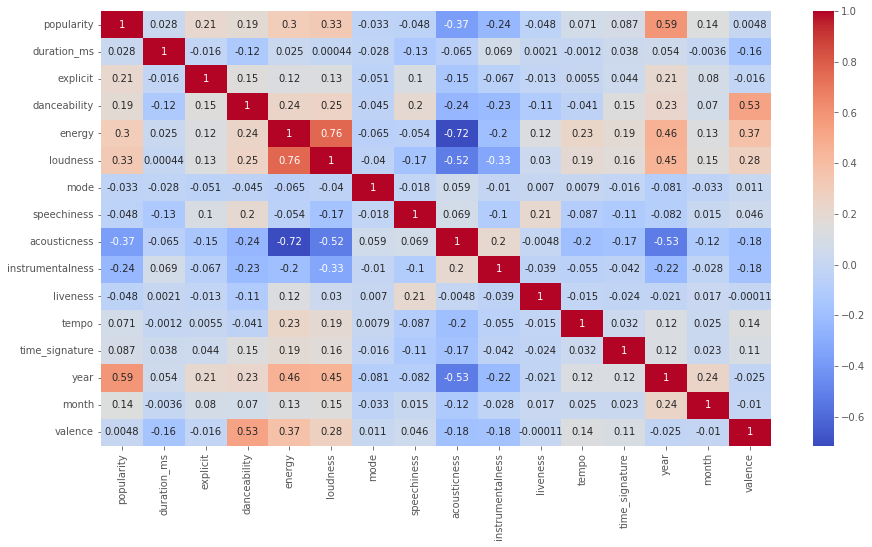

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(songs.corr().iloc[:16,:16],annot=True, cmap='coolwarm')

* We observe that our idea of adding the year variable was fruitful since it is correlated with some variables such as popularity, energy and loudness. 
* However, it is not strongly correlated with valence. 
* For now, we will keep it and decide in the future wether we want to use it in our models 

## Regression

* We saw that danceability, energy and loudness have the highest correlation with valence. 
* Let's do an OLS regression with valence and each one of these variables seperately 

### Valence ~ Danceability 

In [27]:
mod = smf.ols("valence ~ danceability", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                 2.270e+05
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:09   Log-Likelihood:                 59018.
No. Observations:              586077   AIC:                        -1.180e+05
Df Residuals:                  586075   BIC:                        -1.180e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0904      0.001     89.396      0.000       0.088       0.092
danceability     0.8124      0.002    476.406      0.000       0.809       0.816
==============================================================================
Omnibus:                    13007.235   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7412.705
Skew:                          -0.102   Prob(JB):                         0.00
Kurtosis:                       2.488   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a statistically important value that produces an r squared of ~0.279.  
 This is considered quite high considering the fact that we only put one independent value to our model 

### Valence ~ Loudness  

In [28]:
mod = smf.ols("valence ~ loudness", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                 4.816e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:10   Log-Likelihood:                -13759.
No. Observations:              586077   AIC:                         2.752e+04
Df Residuals:                  586075   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1423      0.003    -44.737      0.000      -0.149      -0.136
loudness       0.9121      0.004    219.458      0.000       0.904       0.920
==============================================================================
Omnibus:                   117744.252   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23967.223
Skew:                          -0.093   Prob(JB):                         0.00
Kurtosis:                       2.027   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Another statistically important example, with a p-value of 0 and a lower r squared of ~0.076 

### Valence ~ Energy 

In [29]:
mod = smf.ols("valence ~ energy", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                 9.430e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:10   Log-Likelihood:                 6819.5
No. Observations:              586077   AIC:                        -1.364e+04
Df Residuals:                  586075   BIC:                        -1.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3459      0.001    466.785      0.000       0.344       0.347
energy         0.3808      0.001    307.087      0.000       0.378       0.383
==============================================================================
Omnibus:                    43154.379   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15975.298
Skew:                          -0.138   Prob(JB):                         0.00
Kurtosis:                       2.240   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Lastly, we've got energy which again shows us a ~0.140 r squared, being statistically important 

## Valence ~ Danceability+Energy+Loudness

In [30]:
mod = smf.ols("valence ~ danceability+energy+loudness", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.037e+05
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:10   Log-Likelihood:                 87845.
No. Observations:              586077   AIC:                        -1.757e+05
Df Residuals:                  586073   BIC:                        -1.756e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2010      0.004     57.044      0.000       0.194       0.208
danceability     0.7265      0.002    431.844      0.000       0.723       0.730
energy           0.3406      0.002    202.575      0.000       0.337       0.344
loudness        -0.3236      0.005    -59.320      0.000      -0.334      -0.313
==============================================================================
Omnibus:                     5668.129   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5111.942
Skew:                          -0.185   Prob(JB):                         0.00
Kurtosis:                       2.731   Cond. No.                         35.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We see that with summing those 3 we achieved a ~0.350 r squared. 
* What if we multiplied them?

## valence ~ danceability * energy * loudness

* But what if we wanted to transform our predictors, trying to achieve better results? 
* First we may try to multiply our predictors 

In [31]:
mod = smf.ols("valence ~ danceability*energy*loudness", data=songs)
songs_fitted = mod.fit()
songs_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                 4.652e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:11   Log-Likelihood:                 92596.
No. Observations:              586077   AIC:                        -1.852e+05
Df Residuals:                  586069   BIC:                        -1.851e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1846      0.011    -16.545      0.000      -0.206      -0.163
danceability                     0.9351      0.023     39.882      0.000       0.889       0.981
energy                           1.0092      0.033     30.981      0.000       0.945       1.073
danceability:energy              0.4908      0.059      8.309      0.000       0.375       0.607
loudness                         0.2100      0.017     12.383      0.000       0.177       0.243
danceability:loudness           -0.3290      0.034     -9.592      0.000      -0.396      -0.262
energy:loudness                 -0.8600      0.040    -21.464      0.000      -0.939      -0.781
danceability:energy:loudness    -0.5820      0.073     -7.955      0.000      -0.725      -0.439
==============================================================================
Omnibus:                     6206.383   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6052.623
Skew:                          -0.226   Prob(JB):                         0.00
Kurtosis:                       2.790   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* This model achieved better results, regarding r squared, than the one were we added the 3 variables 

* Another approach would be to use powers for our independent variables 

## valence ~ power(danceability,x) 

* Let's try with danceability first. 

In [32]:
power_terms = ' + '.join(f'np.power(danceability, {x})' for x in range(2, 6))

poly_formula = 'valence ~ danceability + ' + power_terms

print(poly_formula)
mod_5 = smf.ols(formula=poly_formula, data=songs)
boston_res_5 = mod_5.fit()
boston_res_5.summary()

valence ~ danceability + np.power(danceability, 2) + np.power(danceability, 3) + np.power(danceability, 4) + np.power(danceability, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                 4.697e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:11   Log-Likelihood:                 61847.
No. Observations:              586077   AIC:                        -1.237e+05
Df Residuals:                  586071   BIC:                        -1.236e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0158      0.009     -1.756      0.079      -0.033       0.002
danceability                  0.6316      0.118      5.360      0.000       0.401       0.863
np.power(danceability, 2)     4.3327      0.574      7.554      0.000       3.209       5.457
np.power(danceability, 3)   -13.1379      1.281    -10.257      0.000     -15.648     -10.628
np.power(danceability, 4)    15.7323      1.327     11.858      0.000      13.132      18.333
np.power(danceability, 5)    -6.8776      0.516    -13.324      0.000      -7.889      -5.866
==============================================================================
Omnibus:                    14599.173   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8445.466
Skew:                          -0.132   Prob(JB):                         0.00
Kurtosis:                       2.474   Cond. No.                     8.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We observe, that in comparison with the simple model (valence~danceability), the r squared was improved again 

* The same applies for loudness and energy 

## valence ~ power(loudness,x) 

In [33]:
power_terms = ' + '.join(f'np.power(loudness, {x})' for x in range(2, 6))

poly_formula = 'valence ~ loudness + ' + power_terms

print(poly_formula)
mod_5 = smf.ols(formula=poly_formula, data=songs)
boston_res_5 = mod_5.fit()
boston_res_5.summary()

valence ~ loudness + np.power(loudness, 2) + np.power(loudness, 3) + np.power(loudness, 4) + np.power(loudness, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:12   Log-Likelihood:                -11811.
No. Observations:              586077   AIC:                         2.363e+04
Df Residuals:                  586071   BIC:                         2.370e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1242      0.046     -2.704      0.007      -0.214      -0.034
loudness                 10.0310      0.576     17.405      0.000       8.901      11.161
np.power(loudness, 2)   -61.5281      2.832    -21.724      0.000     -67.079     -55.977
np.power(loudness, 3)   145.2237      6.063     23.953      0.000     133.341     157.107
np.power(loudness, 4)  -145.1939      5.910    -24.568      0.000    -156.777    -133.611
np.power(loudness, 5)    52.4429      2.161     24.266      0.000      48.207      56.679
==============================================================================
Omnibus:                   111810.217   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23765.223
Skew:                          -0.108   Prob(JB):                         0.00
Kurtosis:                       2.037   Cond. No.                     4.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## valence ~ power(energy,x) 

In [34]:
power_terms = ' + '.join(f'np.power(energy, {x})' for x in range(2, 6))

poly_formula = 'valence ~ energy + ' + power_terms

print(poly_formula)
mod_5 = smf.ols(formula=poly_formula, data=songs)
boston_res_5 = mod_5.fit()
boston_res_5.summary()

valence ~ energy + np.power(energy, 2) + np.power(energy, 3) + np.power(energy, 4) + np.power(energy, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                 2.649e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:57:12   Log-Likelihood:                 22803.
No. Observations:              586077   AIC:                        -4.559e+04
Df Residuals:                  586071   BIC:                        -4.553e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1901      0.003     63.432      0.000       0.184       0.196
energy                  1.0485      0.051     20.397      0.000       0.948       1.149
np.power(energy, 2)     1.1810      0.292      4.049      0.000       0.609       1.753
np.power(energy, 3)    -8.6709      0.704    -12.309      0.000     -10.052      -7.290
np.power(energy, 4)    13.8301      0.755     18.317      0.000      12.350      15.310
np.power(energy, 5)    -7.1212      0.296    -24.076      0.000      -7.701      -6.541
==============================================================================
Omnibus:                    42821.803   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15638.144
Skew:                          -0.125   Prob(JB):                         0.00
Kurtosis:                       2.240   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Forward Stepwise Selection

* Having done various combinations, let's try to use more variables in order to get the best model. 
* In order to do that we may use forward stepwise selection. 
* The way this method works, is that we start by finding the best possible model for one variable, then with 2, with 3 and so on. 
* But what does best mean? We consider the best model, the one with the highest r sqared adjusted.  

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared. [[Source]](https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp)


* The following code is taken by the course Applied Machine Learning teached by the Associate Professor Panos Louridas in the Department of Management Science and Technology 

* First of all, we write a process_subset function that takes the valence variable, the observations and the columns, fits a model and returns the fitted model 
* We will put our observation data in a matrix, X, to which we will add a constant column that will stand for the intercept.

In [35]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

* Then we will try to find the mode with the best R^2 using get_best_of_k function

In [36]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

* We also add a function that takes the data and the column of the independent variables, finds the best model with k independent variables, and returns both the best model overall and the best model for each k

In [37]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

We add the forward_add_variable which finds the best variable to add at each step 

In [38]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

We add forward_stepwise_selection that does a loop adding a variable at each iteration 

In [39]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        print(model.rsquared_adj)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [40]:
best_model, _ = forward_stepwise_selection(songs, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
0.2791530075716909
Finding the best model for 2 variables
['danceability', 'energy']
0.34276461327665764
Finding the best model for 3 variables
['danceability', 'energy', 'year']
0.42325224053145505
Finding the best model for 4 variables
['danceability', 'energy', 'year', 'tempo']
0.4345842227723409
Finding the best model for 5 variables
['danceability', 'energy', 'year', 'tempo', 'duration_ms']
0.44333507003314143
Finding the best model for 6 variables
['danceability', 'energy', 'year', 'tempo', 'duration_ms', 'acousticness']
0.4506129690270787
Finding the best model for 7 variables
['danceability', 'energy', 'year', 'tempo', 'duration_ms', 'acousticness', 'explicit']
0.45597661870069806
Finding the best model for 8 variables
['danceability', 'energy', 'year', 'tempo', 'duration_ms', 'acousticness', 'explicit', 'speechiness']
0.4596178430191926
Finding the best model for 9 variables
['danceability', 'energy', 'year', 'tempo', 'dur

In [41]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 2.162e+04
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:59:36   Log-Likelihood:             1.4890e+05
No. Observations:              586077   AIC:                        -2.978e+05
Df Residuals:                  586052   BIC:                        -2.975e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.2710      0.004     61.775      0.000       0.262       0.280
danceability         0.8181      0.002    494.218      0.000       0.815       0.821
energy               0.5463      0.002    281.036      0.000       0.542       0.550
year                -0.3597      0.002   -195.828      0.000      -0.363      -0.356
tempo                0.2262      0.002    107.321      0.000       0.222       0.230
duration_ms         -1.0671      0.011    -96.057      0.000      -1.089      -1.045
acousticness         0.1086      0.001     99.684      0.000       0.106       0.111
explicit            -0.0755      0.001    -60.359      0.000      -0.078      -0.073
speechiness         -0.1196      0.001    -79.954      0.000      -0.123      -0.117
instrumentalness    -0.0794      0.001    -77.725      0.000      -0.081      -0.077
loudness            -0.3794      0.005    -70.008      0.000      -0.390      -0.369
mode                 0.0135      0.001     25.162      0.000       0.012       0.015
key_1               -0.0219      0.001    -21.326      0.000      -0.024      -0.020
popularity          -0.0272      0.002    -16.051      0.000      -0.031      -0.024
month               -0.0111      0.001    -15.862      0.000      -0.012      -0.010
key_5                0.0075      0.001      8.173      0.000       0.006       0.009
key_4               -0.0101      0.001    -10.408      0.000      -0.012      -0.008
key_9                0.0029      0.001      3.404      0.001       0.001       0.005
time_signature      -0.0167      0.003     -6.229      0.000      -0.022      -0.011
key_8               -0.0082      0.001     -7.334      0.000      -0.010      -0.006
key_3               -0.0076      0.001     -5.575      0.000      -0.010      -0.005
key_6               -0.0060      0.001     -5.182      0.000      -0.008      -0.004
key_11              -0.0051      0.001     -4.812      0.000      -0.007      -0.003
key_2               -0.0039      0.001     -4.567      0.000      -0.006      -0.002
liveness             0.0041      0.001      2.917      0.004       0.001       0.007
==============================================================================
Omnibus:                     2079.254   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2099.891
Skew:                          -0.146   Prob(JB):                         0.00
Kurtosis:                       2.966   Cond. No.                         96.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The results 

So, having done our reaserch, we have to find which variables explain the model better.  
My initial purpose was to use standardize coefficients.   However the independent variables were not expressed in the same unit of measurement.  
Duly note here, that the regression coefficient depends on the units of measurement of the variables.  
This issue was solved by expressing all the variables in a standardized form.  

Having done that, we obtain the so caled beta coefficients or standardized coefficients. Basically, the beta coefficients enable you to assesss the relative importance of various regressors, because by standardizing you put all regressors on an equal footing.

Taking a look at the summary above, we note the 3 variables with the highest beta coefficients: 
1. Danceability
2. Energy 
3. Loudness

But what does this beta coefficient mean?  
Let's take as an example Danceability.   
Here, it means that with every increase of one standard deviation in Danceability, our dependent variable, which is valence, increases by 0.83 standard deviations. 

* Last, we note that most of our variables have a p-value that signifies statistical importance. Furthuremore, we notice that variables like key, are the ones that do not affect valence by much 

## Q2 

Instead of 3 methods, i tried 5 methods that do not include neural networks to try to predict valence. These include: 
1. Random Forests
2. LightGBM
3. Lasso
4. Ridge 
5. SVR

### Random Forests 

* First, we take a copy of our basic dataframe 

In [42]:
songs_for_dec_trees = songs_unscaled.copy() 

* Due to the fact that training and grid search takes a considerable big amount of time with 500k rows, while the results remain almost the same, we lower the df to the first 25k rows 

In [43]:
songs_for_dec_trees = songs_for_dec_trees.sample(n=25000)

* We want to split our dependent variable(label), from our independent ones 

In [44]:
labels = np.array(songs_for_dec_trees['valence'])
features= songs_for_dec_trees.drop('valence', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

* Moving on, we use the train_test_split method to split our dataset into train and test 

In [45]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

* Importing our regressor 

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

* In order to find the best possible model, lots of hypertuning is needed. 
* We can use RandomizedSearchCV in order to explore a more diverse set of variables. 

In [47]:
from sklearn.model_selection import RandomizedSearchCV

* Let's see some of the variables we can use 

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [4]

* We place those lists to a dictionary

In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

In [50]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=50, random_state=42, n_jobs = -1)

In [51]:
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [400, 522, 644, 766,
                                                         888, 1011, 1133, 1255,
                                                         1377, 1500]},
                   random_state=42, verbose=50)

In [52]:
rf_random.best_params_

{'n_estimators': 644,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 28}

* Note here: While using the above randomizedSearchCV, I used n_iter:50.  
However, since I've got the results from the randomizedSearchCV, I replace 50 with one for time purposes.  
Feel free to change it back to 50 again 

* The best params were: 
1. max_depth: 60,
2. min_samples_leaf: 1,
3. min_samples_split: 2,
4. n_estimators: 1500

* So, we will use grid search to look around that area for better models 

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [60],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [900]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

* Time to fit the model 

In [55]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'bootstrap': True,
 'max_depth': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

* We assign the best estimator to a variable called final model of random forests 
* This estimator, will be used later on the test dataset. 

In [56]:
final_model_of_random_forests = grid_search.best_estimator_

* We shall create a evaluation method that predicts the test dataset using the best model that we found above
* This evaluation method finds Mean Absolute Error and will be used accross other models as well 

In [57]:
from sklearn.metrics import mean_absolute_error
def evaluate(model,test_features,test_labels):
    
    pred_labels = model.predict(test_features)
    errors = abs(pred_labels-test_labels)
    print('Mean Absolut Error: {:0.4f} degrees.'.format(np.mean(errors)))
    

* Let's see the results with our test dataset

In [58]:
evaluate(final_model_of_random_forests, test_features, test_labels)

Mean Absolut Error: 0.1365 degrees.


* Also, we can see the feature importances 

In [59]:
features = songs_for_dec_trees.columns
features=features.tolist()
features.remove('valence')

importances = final_model_of_random_forests.feature_importances_
indices = np.argsort(importances)

* Plotting the feature importances 

* Let's grab only the first factors because the rest do not contribute much to the overall decision tree prediction

In [60]:
indices = indices[13:]

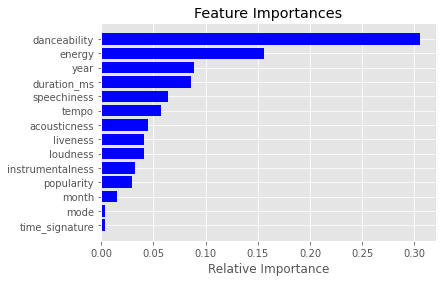

In [61]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

### LightGBM

* We can also try using lightGBM
* For this regressor, I've chosen 4 parameters that may play a big role in our predictive model 
1. `num_leaves`, which is the maximum tree leaves for base learners. This one defaults to 31
2. `learning_rate` which is the step size at each iteration
3. `max_depth` which is the maximum tree depth for base learners
4. `n_estimators` which is the number of boosted trees to fit.

In [62]:
import lightgbm as lgb
parameters = [
  {
   'num_leaves': list(range(10, 60, 20)),
   'learning_rate': [0.02, 0.08,0.4],
   'max_depth': [60,90,110],
   'n_estimators':[100,150,200,250]
  }
 ]

lgbm = GridSearchCV(lgb.LGBMRegressor(random_state=1), parameters, cv=3)
lgbm_fit = lgbm.fit(train_features, train_labels)


* We assign the best estimator to a variable called final model of lightgbm
* This estimator, will be used later on the test dataset. 

In [63]:
final_model_of_lightgbm = lgbm_fit.best_estimator_

In [64]:
evaluate(final_model_of_lightgbm, test_features, test_labels)

Mean Absolut Error: 0.1332 degrees.


In [65]:
features = songs_for_dec_trees.columns
features=features.tolist()
features.remove('valence')

importances = final_model_of_lightgbm.feature_importances_
indices = np.argsort(importances)
indices = indices[13:]

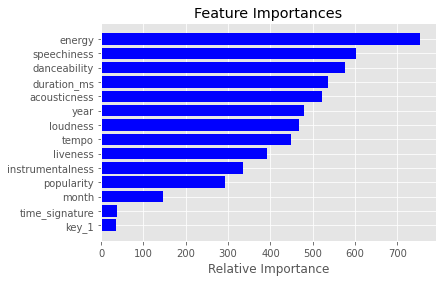

In [66]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

* We notice here, that the lightgbm followed a different approach than random forests and placed danceability in the 3rd place. In the first and second place of lightgbm there is energy and speechiness. In comparison with random forests that had dancability in the first place energy in the second and year in the third. 

## Lasso & Ridge 

* Also, i would like to try Lasso & Ridge methods to predict valence

* First things first, we shall ones more copy the dataframe 

In [138]:
songs_for_lasso_and_ridge = songs.copy()
songs_for_lasso_and_ridge = songs_for_lasso_and_ridge.sample(n=25000)

* The duration variable is not helpful in this model so we drop it 

In [139]:
songs_for_lasso_and_ridge = songs_for_lasso_and_ridge.drop('duration_ms', 1)


C:\Users\3E30~1\AppData\Local\Temp/ipykernel_11260/302718532.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  songs_for_lasso_and_ridge = songs_for_lasso_and_ridge.drop('duration_ms', 1)


* We Assign dependent valence to y ad independent variables to x

In [140]:
independent_variables = songs_for_lasso_and_ridge.columns.drop('valence')
y = songs_for_lasso_and_ridge['valence']
X = songs_for_lasso_and_ridge[independent_variables]

* We split the dataset to train and test using train_test_split method 

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, np.ravel(y),
                test_size = 0.20, random_state = 1)

#### Lasso

In [143]:
import warnings
warnings.simplefilter("ignore", UserWarning)

* Again, we will use gridsearch to find the best possible model. 
* Specifically we will tune: 
1. alpha, which is Constant that multiplies the L1 term.
2. max_iter, which is The maximum number of iterations
3. tol, which is The tolerance for the optimization

In [175]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from numpy import arange

model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=8, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 0.5, 0.01)
grid['max_iter'] = [1000]
grid['tol'] = [0.0001,0.01]
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.153
Config: {'alpha': 0.0, 'max_iter': 1000, 'tol': 0.0001}


* We assign the best estimator to a variable called final model of lasso
* This estimator, will be used later on the test dataset. 

In [176]:
final_model_of_lasso = results.best_estimator_
evaluate(final_model_of_lasso, X_test, y_test)

Mean Absolut Error: 0.1537 degrees.


#### Ridge 

* Similarly, I will try to predict valence using the ridge model 
* Spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, np.ravel(y),
                test_size = 0.20, random_state = 113)

* Ones more, we tune the model, to achieve the best possible one. 
* Speciffically, we choose to experiment with: 
1. max_iter which is the maximum number of iterations.
2. positive which when set to True, forces the coefficients to be positive.
3. tol which is the tolerance for the optimization

In [215]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['max_iter'] = [300,650,700]
grid['positive'] = [False,True]
grid['tol'] = [0.00001,0.0001,0.001]
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.153
Config: {'max_iter': 300, 'positive': False, 'tol': 1e-05}


* We assign the best estimator to a variable called final model of ridge
* This estimator, will be used later on the test dataset. 

In [216]:
final_model_of_ridge = results.best_estimator_
evaluate(final_model_of_ridge, X_test, y_test)

Mean Absolut Error: 0.1537 degrees.


## Support Vector Regression

* The method of SVR works on the principle of the upport Vector Machine. SVR differs from SVM in the way that SVM is a classifier that is used for predicting discrete categorical labels while SVR is a regressor that is used for predicting continuous ordered variables.  
* In SVR the idea is to fit the error inside a certain threshold

* First things first, let's get copy the songs df 

In [ ]:
songs_for_svr = songs.copy()
songs_for_svr=songs_for_svr.sample(25000)

In [ ]:
independent_variables = songs_for_svr.columns.drop('valence')
y = songs_for_svr['valence']
X = songs_for_svr[independent_variables]

* We shall split the test from the train dataset 

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
                        X, np.ravel(y),
                test_size = 0.20, random_state = 101)

* Once again we will use grid search for better results.  
* The parameters of SVR include 2 that I considered important for our predictions:
1. C, which is a regularization parameter. The strength of the regularization is inversely proportional to C. Also, it must be strictly positive.
2. Epsilon, it specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.  

In [ ]:
from sklearn.svm import SVR
param_grid = {'C': [0.1,1],
              'epsilon':[0.01,0.1],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 2, cv = 3)
results = grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  17.9s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  19.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=  17.4s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=  11.1s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=  11.0s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=  11.2s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=  18.8s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=  19.2s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=  20.6s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=  11.8s
[CV] END .......................C=1, epsilon=0.1, kernel=rbf; total time=  12.0s
[CV] END .......................C=1, epsilon=0.1,

* We assign the best estimator to a variable called final model of svr
* This estimator, will be used later on the test dataset. 

In [ ]:
final_model_of_svr = results.best_estimator_

In [ ]:
evaluate(final_model_of_svr, X_test, y_test)

Mean Absolut Error: 0.1392 degrees.


* Let's see the best parameters 

In [ ]:
print(grid.best_params_)

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


* Now, we can predict the values of the test set 

In [ ]:
grid_predictions = grid.predict(X_test)

* Lastly, let's take a look at the mse 

In [ ]:
from sklearn import metrics 
metrics.mean_absolute_error(y_test, grid_predictions)

0.13923972732578813

## Neural Network

In [558]:
songs_for_neural = songs_unscaled.copy()
songs_for_neural=songs_for_neural.sample(n=50000)

* We shall move valence to the last place for easier access to the dependent variable 

In [559]:
x = songs_for_neural['valence']
del songs_for_neural["valence"]
songs_for_neural['valence'] = x 

* We assign all the values in an array 

In [560]:
songs_for_neural_array = songs_for_neural.values

* We compute the length of our df without the valence 

In [561]:
length_of_df_without_valence = len(songs_for_neural_array[0])-1

* We split dependent from independent variables 

In [562]:
X = songs_for_neural_array[:,0:length_of_df_without_valence]

In [563]:
Y = songs_for_neural_array[:,length_of_df_without_valence]

Let's take a look on our arrays 

In [564]:
X[:1],Y[:1]

(array([[ 4.60000e+01,  2.85600e+05,  0.00000e+00,  6.38000e-01,
          5.13000e-01, -6.54600e+00,  1.00000e+00,  3.91000e-02,
          7.96000e-01,  0.00000e+00,  3.02000e-01,  1.66041e+02,
          4.00000e+00,  2.00400e+03,  5.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
          0.00000e+00,  0.00000e+00,  0.00000e+00]]),
 array([0.809]))

* Now, we can use train_test_split to split our data. 
* However in this case we will not only split them to train and test.
* We also need a validation set which is a sample of data held back from training our model that is used to give an estimate of model skill while tuning model's hyperparameters

* Having said that, we first do the normal trian test split to train and test 

In [565]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)

* After that, we can split the 2 variables to val and test 

In [566]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

* Let's take a look on the sizes of those sets 

In [567]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(40000, 27) (5000, 27) (5000, 27) (40000,) (5000,) (5000,)


* For the neural networks, we will use the unscaled dataset.  
* We will do that because we will normalize our data using a normalizer layer 

In [568]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [591]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

* We will also implement early stop to avoid useless iterations that do not improve our model 

In [592]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

* The following is another type of early stopping 

In [620]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.02)

* Let's go ahead and create our network 

In [637]:
model = Sequential([
    normalizer,
    Dense(128, activation='relu', input_shape=(27,)),
    Dropout(0.37),
    Dense(1,activation='sigmoid'),
])

* Our network, consists from a dense layer with a relu activation function. The input shape is 27, as many as our columns  
* Also we will add a dropout layer to help preventing overfitting 
* Last but not least we will put another Dense layer, with sigmoid activation this time which maps the resulting variables between 0 and 1, just like valence 

In [638]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

* Let's try to fit our model with a batch size of 64 and 200 epochs 

In [639]:
hist = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/100
625/625 [==============================] - 1s 2ms/step - loss: 0.1634 - val_loss: 0.1456
Epoch 2/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1470 - val_loss: 0.1424
Epoch 3/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1439 - val_loss: 0.1415
Epoch 4/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1422 - val_loss: 0.1409
Epoch 5/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1412 - val_loss: 0.1403
Epoch 6/100
625/625 [==============================] - 1s 1ms/step - loss: 0.1404 - val_loss: 0.1399
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 0.1400 - val_loss: 0.1396
Epoch 8/100
625/625 [==============================] - 1s 2ms/step - loss: 0.1393 - val_loss: 0.1395
Epoch 9/100
625/625 [==============================] - 1s 2ms/step - loss: 0.1392 - val_loss: 0.1392
Epoch 10/100
625/625 [==============================] - 1s 2ms/step - loss: 0.1388 - val_lo

In [640]:
model.evaluate(X_test, Y_test,verbose=0)

0.13329459726810455

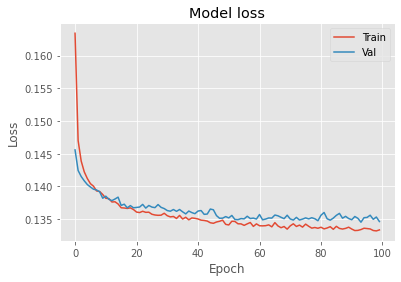

In [641]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Obtaining the Test dataset

* On our data folder, we have a list of song id's.
* Through spotify's api, we can obtain details about those songs 

* First of all, we should create a spotipy object using our credentials.  
* Once this repo gets public on Github, I will replace those credentials with X values so that any user can clone this repo using her/his own.

In [ ]:
client_id = "7b172c47988b4d2da267ad35a2a23d88"
client_secret = "bd980144781a436ca841e0d54187cd74"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

* Now, using simple python commands we can read the .txt file and assign each values to a list

In [ ]:
with open('data/spotify_ids.txt', 'r') as f:
    all_track_ids_for_test = [line.strip() for line in f]

* Now, using [audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features), we can obtain the features of each song

In [ ]:
features = {}

start = 0
num_tracks = 100
while start < len(all_track_ids_for_test):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids_for_test[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


* Now, we can transform this dictionary to a dataframe and place as index the song id

In [ ]:
tracks_to_test = pd.DataFrame.from_dict(features, orient='index') 
tracks = tracks_to_test.reset_index().rename(columns={'index' : 'song_id'})

* Let's delete the unuseful columns

In [ ]:
to_be_deleted = ['type','id','uri','track_href','analysis_url']
drop_columns(tracks, to_be_deleted) 

* Using the same method, we can also obtain other useful characteristics for the songs by the [tracks](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track) api
* We are interested in:
1. Release Date, which can be found in album 
2. Explicit 
3. Popularity 

In [ ]:
dicti = {}
for i in all_track_ids_for_test:
    features = sp.track(i)
    to_be_added_to_dict = {i:[features['album']['release_date'],features['explicit'],features['popularity']]}
    dicti.update(to_be_added_to_dict)


* Transforming the dict to df 

In [ ]:
release_date_explicit_popularity = pd.DataFrame.from_dict(dicti, orient='index') 

In [ ]:
release_date_explicit_popularity.head(5)

,0,1,2
7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,True,34
5QO79kh1waicV47BqGRL3g,2020-03-20,True,90
0VjIjW4GlUZAMYd2vXMi3b,2020-03-20,False,94
4MzXwWMhyBbmu6hOcLVD49,2020-11-27,True,87
5Kskr9LcNYa0tpt5f0ZEJx,2021-02-12,True,8


* Let's transform our dataset, by renaming the columns and fixing the index 

In [ ]:
release_date_explicit_popularity = release_date_explicit_popularity.reset_index().rename(columns={'index' : 'song_id'})
release_date_explicit_popularity = release_date_explicit_popularity.rename(columns={0: 'release_date', 1: 'explicit',2:'popularity'})
release_date_explicit_popularity.set_index('song_id',inplace=True)

* Now, we can merge the 3 columns with the test dataframe using the merge function

In [ ]:
tracks_with_3_extra_columns = pd.merge(tracks, release_date_explicit_popularity[['release_date', 'explicit','popularity']], on='song_id', how='left')

In [ ]:
tracks_with_3_extra_columns.set_index('song_id',inplace=True)

* Another thing we need, is to extract year and month from release date characteristic 

In [ ]:
tracks_with_3_extra_columns['year'] = pd.DatetimeIndex(tracks_with_3_extra_columns['release_date']).year
tracks_with_3_extra_columns['month'] = pd.DatetimeIndex(tracks_with_3_extra_columns['release_date']).month

In [ ]:
tracks_with_3_extra_columns.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,explicit,popularity,year,month
song_id,,,,,,,,,,,,,,,,,,
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4,2021-01-08,True,34,2021,1
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4,2020-03-20,True,90,2020,3
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,2020-03-20,False,94,2020,3
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4,2020-11-27,True,87,2020,11
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4,2021-02-12,True,8,2021,2


* Now that we extracted the info we wanted from release date, it is useless and we can drop it 

In [ ]:
to_be_deleted = ['release_date']
drop_columns(tracks_with_3_extra_columns, to_be_deleted) 

* Let's make a copy of this dataframe and scale it

In [ ]:
from sklearn import preprocessing
louridas_test_dataset_unscaled = tracks_with_3_extra_columns.copy()
louridas_test_dataset_scaled = scale_whole_df_except_valence(tracks_with_3_extra_columns) 

* Now, we can turn into dummy the variable key in both dataframes 

In [ ]:
louridas_test_dataset_unscaled = dummify_key(louridas_test_dataset_unscaled)
louridas_test_dataset_scaled = dummify_key(louridas_test_dataset_scaled)

In [ ]:
order_of_columns = songs.columns 

In [ ]:
louridas_test_dataset_unscaled = louridas_test_dataset_unscaled[order_of_columns]
louridas_test_dataset_scaled = louridas_test_dataset_scaled[order_of_columns]

## Evaluating the models to the given test dataset 

#### Lasso and Ridge 

* Lasso and Ridge have to be scaled so we use the df that we just scaled to split it to features and labels 

* And now we pass the features and the label  to the evaluate function which calculates the Mean Absolute Error

In [ ]:
louridas_test_dataset_scaled = louridas_test_dataset_scaled.drop('duration_ms', 1)


labels = np.array(louridas_test_dataset_scaled['valence'])
features= louridas_test_dataset_scaled.drop('valence', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

### Lasso 

In [ ]:
evaluate(final_model_of_lasso, features, labels) 

Mean Absolut Error: 0.1554 degrees.


### Ridge 

In [ ]:
evaluate(final_model_of_ridge, features, labels) 

Mean Absolut Error: 0.1553 degrees.


### SVR

In [ ]:
evaluate(final_model_of_svr, features, labels) 

* The score of SVR is comparatively so we are looking forward to see what other methods did. 

#### And now, we go down to the 2 best non neural network methods that we used to predict valence

* We first split the unscaled df to labels and features 

In [ ]:
labels = np.array(louridas_test_dataset_unscaled['valence'])
features= louridas_test_dataset_unscaled.drop('valence', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

### Random Forest

In [ ]:
evaluate(final_model_of_random_forests, features, labels) 

Mean Absolut Error: 0.1452 degrees.


* The random forests method, brought us a very pleasing result, close to 0.14 Mean Absolute Error

#### LightGBM

In [ ]:
evaluate(final_model_of_lightgbm, features, labels) 

Mean Absolut Error: 0.1413 degrees.


* The last not-neural network method was lightgbm algorithm who scored close to 0.14 

## Predicting valence using neural networks 

* We notice that the explicit column has True/False values while we need Integers. 
* astype(int) function, will help us solve this issue 

In [ ]:
louridas_test_dataset_unscaled["explicit"] = louridas_test_dataset_unscaled["explicit"].astype(int)

In [ ]:
x = louridas_test_dataset_unscaled['valence']
del louridas_test_dataset_unscaled["valence"]
louridas_test_dataset_unscaled['valence'] = x 

In [643]:
songs_for_neural_array = louridas_test_dataset_unscaled.values
length_of_df_without_valence = len(songs_for_neural_array[0])-1
X = songs_for_neural_array[:,0:length_of_df_without_valence]
Y = songs_for_neural_array[:,length_of_df_without_valence]

* And the final score is...

In [644]:
model.evaluate(X, Y,verbose=0)

0.1444893628358841

* After all, the best overall score was achieved by lightgbm with a score of 

### Thanks to: 
* <code>Stack Overflow</code>, which was my closest friend the past week.
* <code>Pandas documentation </code> which helped me through some diffifcult moments.  
* <code> Our professor, Panos Louridas </code>  for the knowledge you teached us in our university journey, which after 4 years, comes to an end